# Крестики-нолики

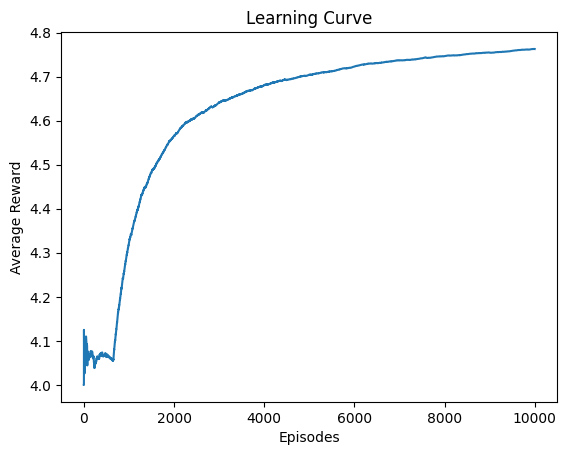

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random

class TicTacToe:
    def __init__(self):
        self.board = [' '] * 9  # Поле игры 3x3
        self.current_player = 'X'  # Игрок, делающий ход

    def reset(self):
        self.board = [' '] * 9
        self.current_player = 'X'
        return tuple(self.board)

    def step(self, action):
        if self.board[action] != ' ':
            raise ValueError("Invalid move")

        self.board[action] = self.current_player
        reward, done = self.evaluate_game()

        # Смена игрока
        self.current_player = 'O' if self.current_player == 'X' else 'X'
        return tuple(self.board), reward, done

    def evaluate_game(self):
        winning_combinations = [
            (0, 1, 2), (3, 4, 5), (6, 7, 8),  # горизонтали
            (0, 3, 6), (1, 4, 7), (2, 5, 8),  # вертикали
            (0, 4, 8), (2, 4, 6)              # диагонали
        ]
        for combo in winning_combinations:
            if self.board[combo[0]] == self.board[combo[1]] == self.board[combo[2]] != ' ':
                return (1 if self.board[combo[0]] == 'X' else 0, True)

        if ' ' not in self.board:  # Ничья
            return 0.5, True

        return 0.5, False  # Игра продолжается

    def get_available_actions(self):
        return [i for i, cell in enumerate(self.board) if cell == ' ']

def epsilon_greedy_action(state, value_table, epsilon=0.05):
    available_actions = [i for i, cell in enumerate(state) if cell == ' ']
    if random.random() < epsilon:
        return random.choice(available_actions)  # Случайный ход
    else:
        values = [value_table.get((state, action), -0.5) for action in available_actions]
        return available_actions[np.argmax(values)]

def train_tic_tac_toe(episodes, alpha=0.1, gamma=0.9):
    env = TicTacToe()
    value_table = {}
    rewards = []
    total_reward = 0

    for episode in range(episodes):
        state = env.reset()
        done = False
        episode_reward = 0

        while not done:
            # Выбор действия с учетом доступных ходов
            action = epsilon_greedy_action(state, value_table)
            try:
                next_state, reward, done = env.step(action)
            except ValueError:
                print(f"Invalid move detected: {action}, state: {state}")
                break

            # Выбор следующего действия
            if not done:
                next_action = epsilon_greedy_action(next_state, value_table)
            else:
                next_action = None

            # SARSA update rule
            old_value = value_table.get((state, action), 0.5)
            next_value = value_table.get((next_state, next_action), 0.5) if next_action is not None else 0
            value_table[(state, action)] = old_value + alpha * (reward + gamma * next_value - old_value)

            state = next_state
            episode_reward += reward

        total_reward += episode_reward
        rewards.append(total_reward / (episode + 1))

    return value_table, rewards


def plot_rewards(rewards):
    plt.plot(rewards)
    plt.xlabel("Episodes")
    plt.ylabel("Average Reward")
    plt.title("Learning Curve")
    plt.show()

if __name__ == "__main__":
    episodes = 10000
    value_table, rewards = train_tic_tac_toe(episodes)
    plot_rewards(rewards)
